# Problem Statement
- At some point or the other almost each one of us has used an Ola or Uber for taking a ride.

- Ride hailing services are services that use online-enabled platforms to connect between passengers and local drivers using their personal vehicles. In most cases they are a comfortable method for door-to-door transport. Usually they are cheaper than using licensed taxicabs. Examples of ride hailing services include Uber and Lyft.
- To improve the efficiency of taxi dispatching systems for such services, it is important to be able to predict how long a driver will have his taxi occupied. If a dispatcher knew approximately when a taxi driver would be ending their current ride, they would be better able to identify which driver to assign to each pickup request.

- In this competition, we are challenged to build a model that predicts the total ride duration of taxi trips in New York City.

## 1. Exploratory Data Analysis
Let's check the data files! According to the data description we should find the following columns:

 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration** - (target) duration of the trip in seconds

Here, we have 2 variables dropoff_datetime and store_and_fwd_flag which are not available before the trip starts and hence will not be used as features to the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


- Data has 729322 Entries And 11 column
- Datetime Column is in Object Class Has to be Converted to Date Time Form

(<AxesSubplot:>,
 id                    0
 vendor_id             0
 pickup_datetime       0
 dropoff_datetime      0
 passenger_count       0
 pickup_longitude      0
 pickup_latitude       0
 dropoff_longitude     0
 dropoff_latitude      0
 store_and_fwd_flag    0
 trip_duration         0
 dtype: int64)

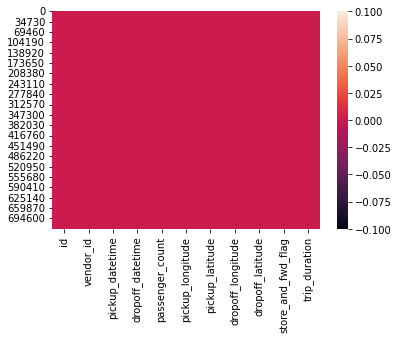

In [5]:
sns.heatmap(df.isna(),),df.isna().sum()

- Luckily we dont have any Null values in this data set

In [6]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

- we can Confirm all Entries are unique and no Duplicates are present in Data By looking at Unique ID
- Theres Only 2 Vendors 


In [7]:
df["dropoff_datetime"]=pd.to_datetime(df["dropoff_datetime"])
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

In [8]:
colms=["Hour","dayofweek","Month"]
hour=df.pickup_datetime.dt.hour
dayofweek=df.pickup_datetime.dt.dayofweek
month=df.pickup_datetime.dt.month

df_Time=pd.DataFrame({'Hour' : hour,
                     'DayofWeek': dayofweek,
                     'month': month})

In [9]:
df=pd.concat([df,df_Time],axis=1)
df.head()  

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,DayofWeek,month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,16,0,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,23,4,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,17,6,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,9,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,6,2,2


In [10]:
df["store_and_fwd_flag"]=(df["store_and_fwd_flag"]=="Y")*1

In [11]:
df["store_and_fwd_flag"].value_counts()

0    725282
1      4040
Name: store_and_fwd_flag, dtype: int64

# Univariant Analysis

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

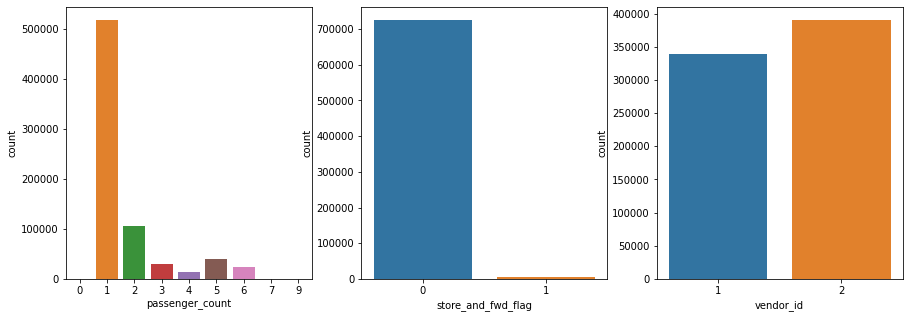

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(df.passenger_count)
plt.subplot(132)
sns.countplot(x=(df["store_and_fwd_flag"]))
plt.subplot(133)
sns.countplot(x=(df["vendor_id"]))

- More than 70% of rides have only one passenger
- Way less Trips has trip data stored in Vechile
- Vendor 2 does seem to have more trips than  1

<AxesSubplot:xlabel='month', ylabel='count'>

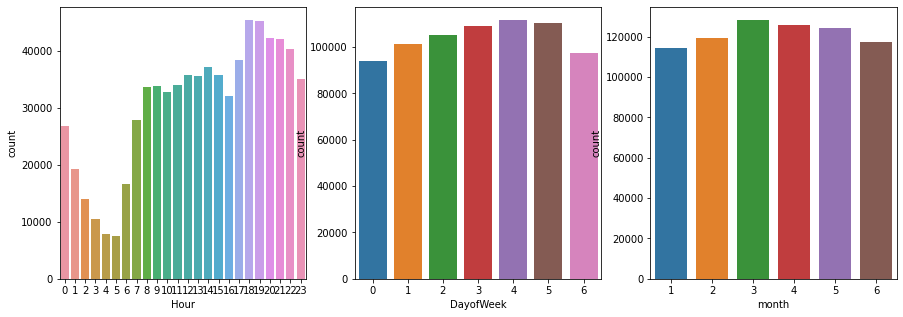

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(df.Hour)
plt.subplot(132)
sns.countplot(df.DayofWeek)
plt.subplot(133)
sns.countplot(df.month)

- Lot of Trip seems to happening aat night compared to arounf morning 5 there seems to lot less as expected less people Travels in morning
- Most trips seems to be happening During weekdays ,still not suprising as i expected weekdays to busy days 
- Monthly Third month as highest number of trips my guess it would be summer season as peolple would prefer Taxi Rather than a walk

# Target Data Analysis

In [14]:
df.trip_duration.describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

- Max Hour of trip is 538 hr kinda lot higher than usual
- Mean seems to be around 0.26 hrs around 15mins and lowest is 0.000278 thats around 1 second,lot less for to consider it has trip
- as we can see Data has outliers are those are suspisions too 

<AxesSubplot:>

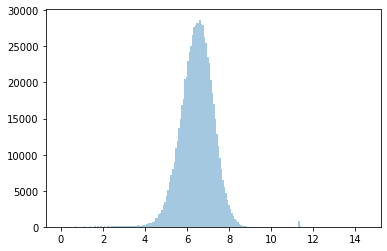

In [15]:
sns.distplot(np.log(df.trip_duration.values), kde = False, bins = 200,)

# Bivariate Analysis with target

<AxesSubplot:>

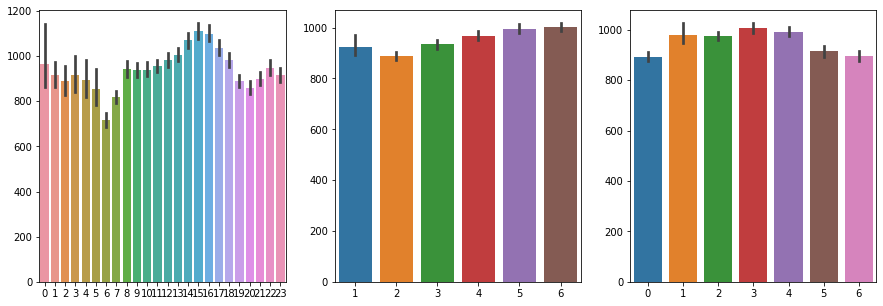

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.barplot(x=df.Hour.values,y=df.trip_duration.values)
plt.subplot(132)
sns.barplot(x=df.month.values,y=df.trip_duration.values)
plt.subplot(133)
sns.barplot(x=df.DayofWeek.values,y=df.trip_duration.values)


- Length of trips seems of high around 12 pm to 6 pm ,unusally high length trips around 12am
- montly it looks more number of long trips arounf 5,6months
- 3rd day of weekday seems to when longest trips are happening

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

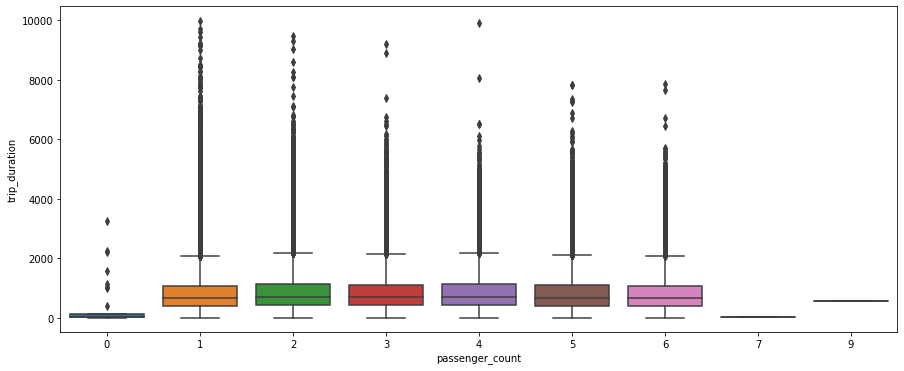

In [17]:
plt.figure(figsize=(15,6))
df_out=df[df.trip_duration<10000]
sns.boxplot(x="passenger_count",y="trip_duration",data=df_out)

- we can see thatnumber of outliers seems to be going down as passengers increase 
- there isnt much difference in ranges between 1 to 5 number passenger 

<AxesSubplot:>

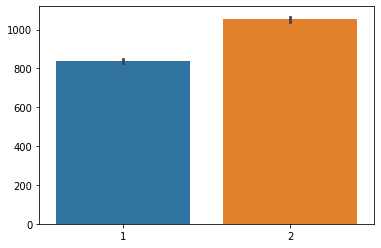

In [18]:
sns.barplot(x=df.vendor_id.values,y=df.trip_duration.values)

- Vendor 2 has longer trips compared to vendor one

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

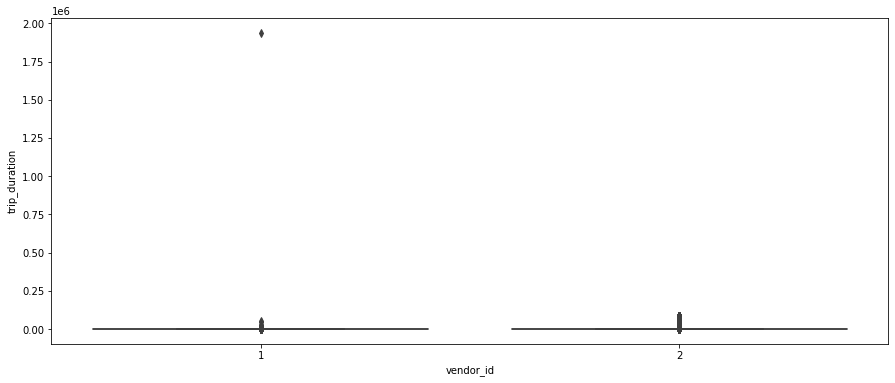

In [19]:
plt.figure(figsize=(15,6))
df_out1=df[df.trip_duration<50000]
sns.boxplot(x="vendor_id",y="trip_duration",data=df)

- There seems to be high outliers with vendor 1

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

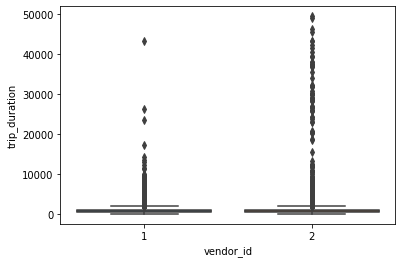

In [20]:
sns.boxplot(x="vendor_id",y="trip_duration",data=df_out1)

- on median scale vendors 2 has more outliers compared to 1

# Lets see what geographic Locations tells

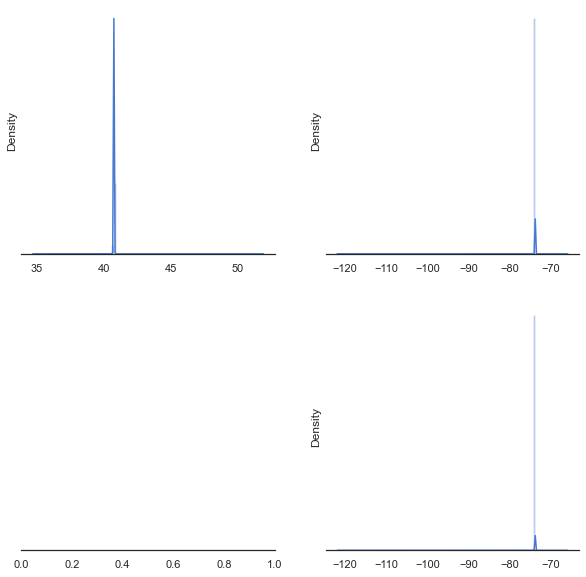

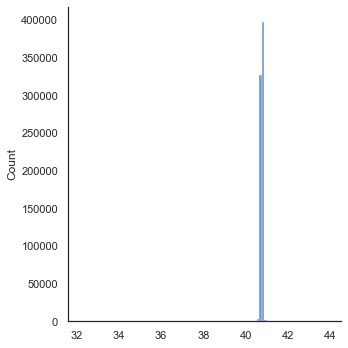

In [21]:
sns.set(style="white", palette="muted", color_codes=True)
f,axs= plt.subplots(2,2,figsize=(10,10),sharex=False,sharey=False)
sns.despine(left=True)
sns.distplot(df["pickup_longitude"].values,label='pickup_longitude',bins=100,ax=axs[0,1])
sns.distplot(df["pickup_latitude"].values,label='pickup_latitude',bins=100,ax=axs[0,0])
sns.distplot(df["dropoff_longitude"].values,label='dropoff_longitude',bins=100,ax=axs[1,1])
sns.displot(df["dropoff_latitude"].values,label='dropoff_latitude',bins=100,ax=axs[1,0])
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()

- Data is segregated at very low range as we can see due to minor outliers present at max and min section

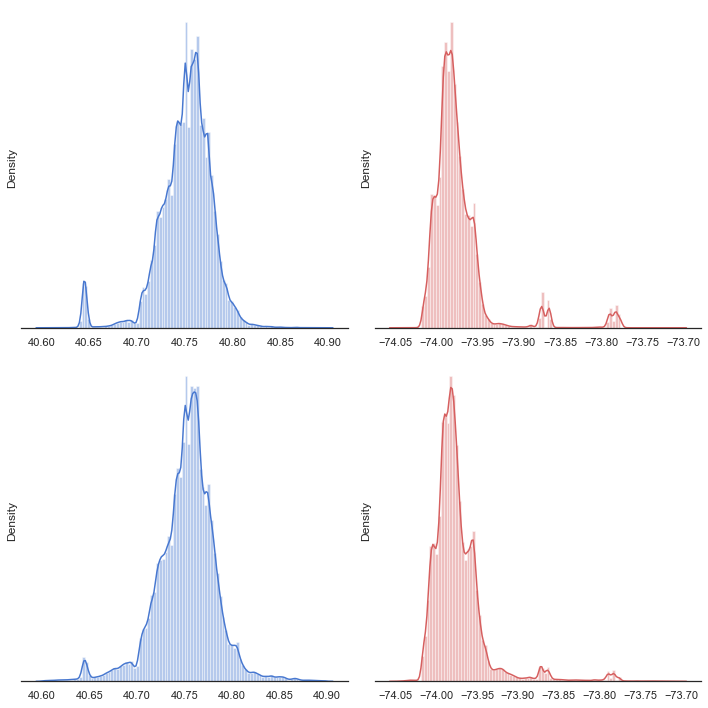

In [22]:
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df_data_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

- Now we can see better with less spike structure
- as we can see most trips as located in between this ranges of lat and longs

<AxesSubplot:>

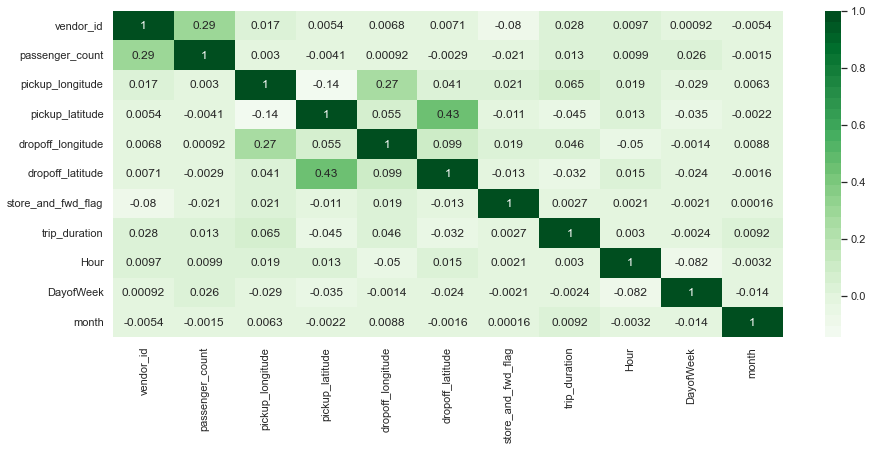

In [23]:
plt.figure(figsize=(15,6))
colormap = sns.color_palette("Greens",30)
sns.heatmap(df.corr(),annot=df.corr(),cmap=colormap)

- it seems like theres little bit of corelation of trip duration and pickup_lattitude
- Vendor_id has good amount of correlation with Passenger_count

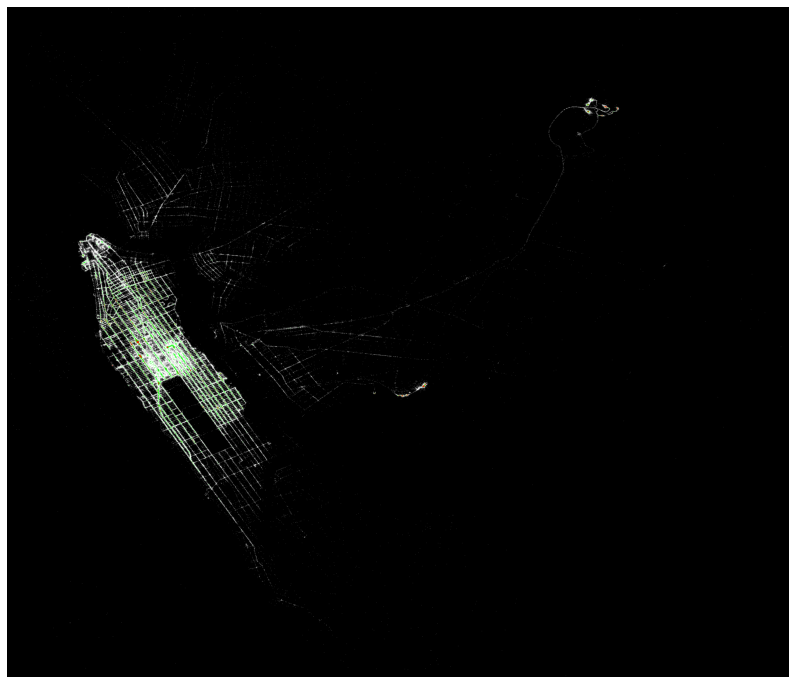

In [24]:

rgb = np.zeros((3000, 3500, 3), dtype=np.uint8)
rgb[..., 0] = 0
rgb[..., 1] = 0
rgb[..., 2] = 0
df_data_new['pick_lat_new'] = list(map(int, (df['pickup_latitude'] - (40.6000))*10000))
df_data_new['drop_lat_new'] = list(map(int, (df['dropoff_latitude'] - (40.6000))*10000))
df_data_new['pick_lon_new'] = list(map(int, (df['pickup_longitude'] - (-74.050))*10000))
df_data_new['drop_lon_new'] = list(map(int,(df['dropoff_longitude'] - (-74.050))*10000))

summary_plot = pd.DataFrame(df_data_new.groupby(['pick_lat_new', 'pick_lon_new'])['id'].count())

summary_plot.reset_index(inplace = True)
summary_plot.head(120)
lat_list = summary_plot['pick_lat_new'].unique()
for i in lat_list:
    lon_list = summary_plot.loc[summary_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
    unit = summary_plot.loc[summary_plot['pick_lat_new']==i]['id'].tolist()
    for j in lon_list:
        a = unit[lon_list.index(j)]
        if (a//25) >0:
            rgb[i][j][0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 0
        elif (a//10)>0:
            rgb[i,j, 0] = 0
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 0
        else:
            rgb[i,j, 0] = 255
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 255
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
ax.imshow(rgb, cmap = 'hot')
ax.set_axis_off() 


### Conclusions
1. The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5)  i.e. about 17 minutes.
2. There are several suspiciously short rides with less than 10 seconds duration.
3. As discussed earlier, there are a few huge outliers near 12.
4. Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number.
5. Vendor 2 has more number of trips as compared to vendor 1
6. Number of pickups for weekends is much lower than week days with a peak on Thursday (4). Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday.
7. Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours.
8. We see that most trips are concentrated between these lat long only with a few significant clusters. These clusters are represented by the numerous peaks in the lattitude and longitude histograms
9. Trip durations are definitely shorter for late night and early morning hours that can be attributed to low traffic density
10. It follows a similar pattern when compared to number of pickups indicating a correlation between number of pickups and trip duration
11. Median trip duration does not vary much as can be seen from the above plot for different vendors.
12. The boxplot clearly shows that there not much of a difference in distribution for the most frequently occuring passenger count values - 1, 2, 3.
13. Another key observation is that the number of outliers are reduced for higher passenger counts but that only comes down to the individual frequencies of each passenger count.
14. From the correlation heatmap we see that the lattitude and longitude features have higher correlation with the target as compared to the other features.